
# LOGISTIC REGRESSION

# 1. Data Exploration:

In [1]:
# Importing library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import accuracy_score
!pip install streamlit
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip show streamlit



Name: streamlit
Version: 1.39.0
Summary: A faster way to build and share data apps
Home-page: https://streamlit.io
Author: Snowflake Inc
Author-email: hello@streamlit.io
License: Apache License 2.0
Location: C:\Users\sahil\AppData\Roaming\Python\Python311\site-packages
Requires: altair, blinker, cachetools, click, gitpython, numpy, packaging, pandas, pillow, protobuf, pyarrow, pydeck, requests, rich, tenacity, toml, tornado, typing-extensions, watchdog
Required-by: 


In [3]:
# Reading dataset

titanic_train = pd.read_csv(r"C:\Users\sahil\Desktop\excelr data science\Assignments Solution SAHILRUHIL\Logistic Regression\Titanic_train.csv")
titanic_test = pd.read_csv(r"C:\Users\sahil\Desktop\excelr data science\Assignments Solution SAHILRUHIL\Logistic Regression\Titanic_test.csv")

In [4]:
# Displaying head of our data

titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Printing shape of data

print(f'The shape of titanic train data :{titanic_train.shape}')
print(f'The shape of titanic test data :{titanic_test.shape}')


The shape of titanic train data :(891, 12)
The shape of titanic test data :(418, 11)


In [6]:
# Checking information of dataset

titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Checking missing values

print("Missing Values (Train):")
print(titanic_train.isnull().sum())

print("Missing Values (Test):")
print(titanic_test.isnull().sum())


Missing Values (Train):
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Missing Values (Test):
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [8]:
# Summary statistics for our data

titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

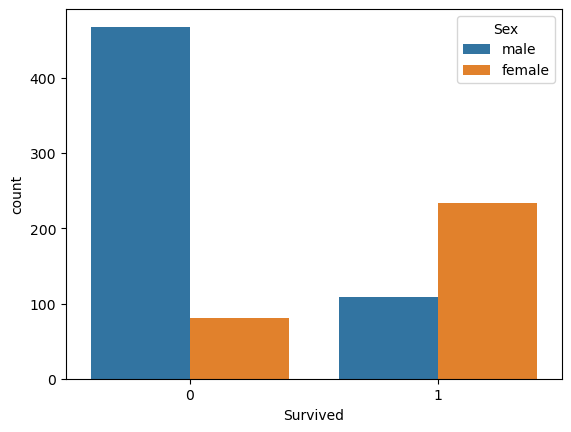

In [9]:
# Now we will be visualizing the data, as we also have catogerical data we can easily plot them.

# Count plot of people survived w.r.t sex 

sns.countplot(x = 'Survived' ,hue ='Sex' ,data =titanic_train)

<Axes: xlabel='Survived', ylabel='count'>

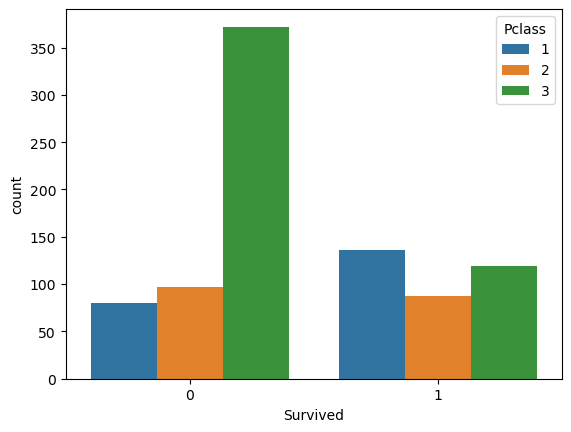

In [10]:
# Count plot of people survived w.r.t Pclass 

sns.countplot(x = 'Survived' ,hue ='Pclass' ,data =titanic_train)

<Axes: xlabel='Survived', ylabel='count'>

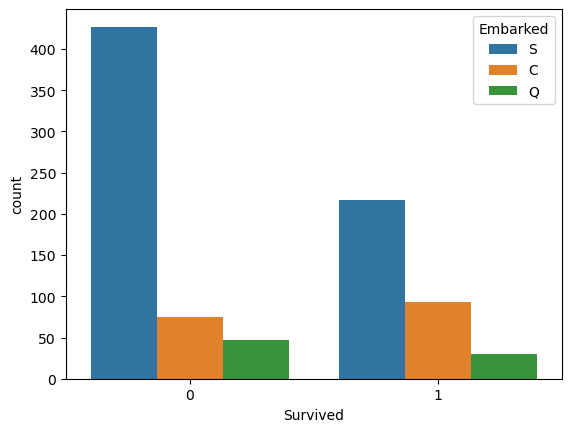

In [11]:
# Countplot of people survived w.r.t. embarked
sns.countplot(x = 'Survived' , hue = 'Embarked', data = titanic_train)

<Axes: xlabel='Survived', ylabel='Count'>

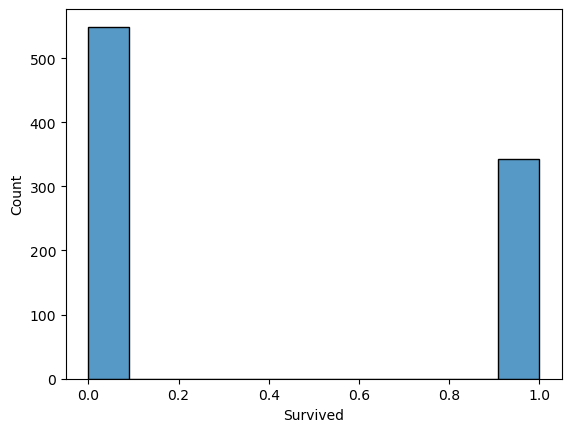

In [12]:
sns.histplot(titanic_train['Survived'])

<Axes: xlabel='Age', ylabel='Count'>

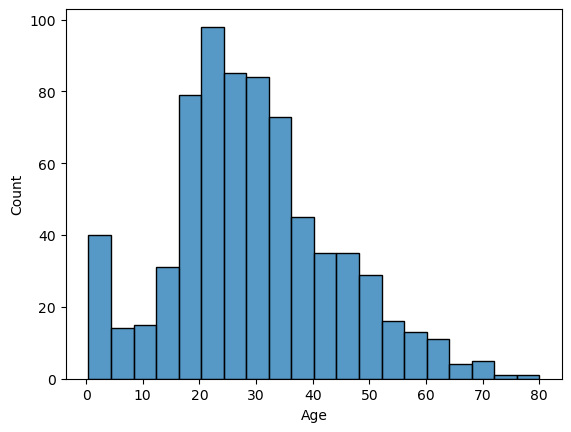

In [13]:
sns.histplot(titanic_train['Age'])

<Axes: xlabel='Pclass', ylabel='Count'>

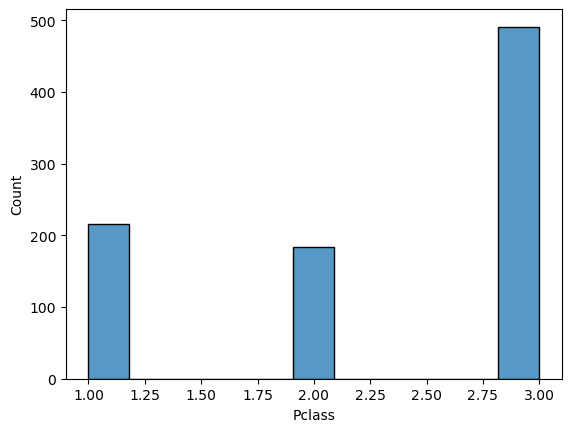

In [14]:
sns.histplot(titanic_train['Pclass'])

<Axes: >

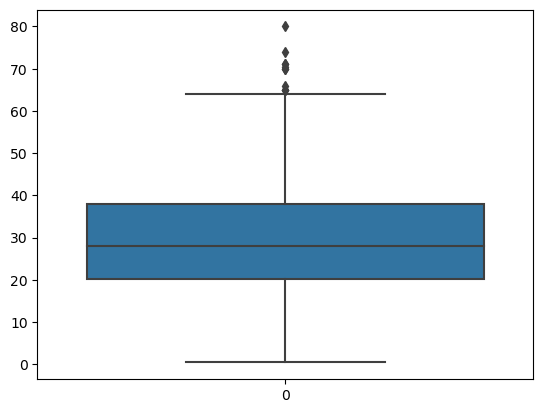

In [15]:
sns.boxplot(titanic_train['Age'])

<Axes: >

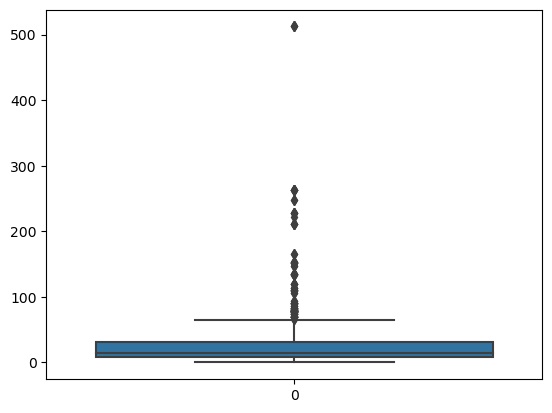

In [16]:
sns.boxplot(titanic_train['Fare'])

# 2. Data Preprocessing:

In [17]:
# Preprocessing  both titanic_test and titanic_train

# Define features and target for training
X_train = titanic_train.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'])
y_train = titanic_train['Survived']


In [18]:
# Features for testing (no 'Survived' column in test data)

X_test = titanic_test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [19]:
# Defining numerical and categorical columns

numerical_features = ['Age', 'Fare']
categorical_features = ['Sex', 'Embarked', 'Pclass']


In [20]:
# Preprocessing pipelines for numerical and categorical data

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


In [21]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [22]:
# Combining  preprocessors in a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# 3. Model Building:

In [23]:
# Building a Logistic Regression model pipeline

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=0))
])

In [24]:
# Training the model on the training data

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked',
                                                   'Pclass'])])),
                ('classifier', LogisticRegression(random_state=0))])

In [25]:
# Saving  the trained model

import joblib
joblib.dump(model_pipeline, 'logistic_model_titanic.pkl')

['logistic_model_titanic.pkl']

# 4: Model Evaluation

In [26]:
# Prediction on training data

y_train_pred = model_pipeline.predict(X_train)
y_train_pred_proba = model_pipeline.predict_proba(X_train)[:, 1]


In [27]:
# Calculating evaluation metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)
roc_auc = roc_auc_score(y_train, y_train_pred_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 0.79
Precision: 0.74
Recall: 0.70
F1-Score: 0.72
ROC-AUC: 0.85


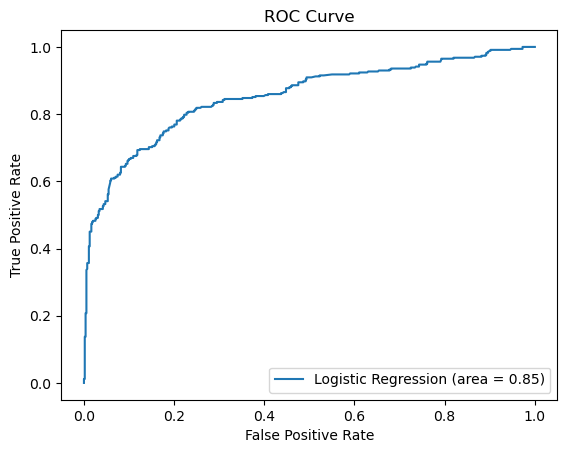

In [28]:
# Ploting  the ROC Curve

fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label="Logistic Regression (area = {:.2f})".format(roc_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# 5: Predictions on the Test Set

In [29]:
# Making Predictions on the Test Set

y_test_pred = model_pipeline.predict(X_test)  # Predicted class labels (0 or 1)
y_test_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1 (survival probability)

# Combining Predictions with Test Data (for better visualization)

X_test['Survived_Prediction'] = y_test_pred  # Add predicted labels to X_test DataFrame
X_test['Survival_Probability'] = y_test_pred_proba  # Add predicted probabilities to X_test DataFrame


In [30]:
print(X_test.head())

   Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Survived_Prediction  \
0       3    male  34.5      0      0   7.8292        Q                    0   
1       3  female  47.0      1      0   7.0000        S                    0   
2       2    male  62.0      0      0   9.6875        Q                    0   
3       3    male  27.0      0      0   8.6625        S                    0   
4       3  female  22.0      1      1  12.2875        S                    1   

   Survival_Probability  
0              0.107664  
1              0.372356  
2              0.153168  
3              0.083168  
4              0.568776  


In [31]:
# Count of predicted survival outcomes
survival_counts = X_test['Survived_Prediction'].value_counts()  # Corrected DataFrame reference
print("\nPredicted Survival Counts:")
print(survival_counts)



Predicted Survival Counts:
0    259
1    159
Name: Survived_Prediction, dtype: int64


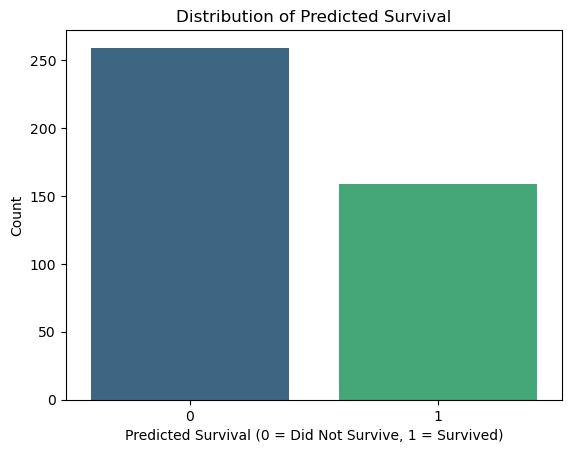

In [32]:
# Survival prediction distribution
sns.countplot(data=X_test, x='Survived_Prediction', palette="viridis")
plt.title("Distribution of Predicted Survival")
plt.xlabel("Predicted Survival (0 = Did Not Survive, 1 = Survived)")
plt.ylabel("Count")
plt.show()

# 6. Interpretation

In [33]:
# Get the categorical feature names after one-hot encoding
encoded_features = preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine numerical and categorical feature names
all_features = np.concatenate([numerical_features, encoded_features])

# Extract coefficients from the logistic regression model
coef = model_pipeline.named_steps['classifier'].coef_[0]

# Create a DataFrame with feature names and coefficients
coef_df = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': coef
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)



      Feature  Coefficient
2  Sex_female     1.318680
7    Pclass_1     1.063508
4  Embarked_C     0.221003
5  Embarked_Q     0.212551
8    Pclass_2     0.168912
1        Fare     0.025663
6  Embarked_S    -0.311991
0         Age    -0.413882
9    Pclass_3    -1.110857
3    Sex_male    -1.197117


# 7. Deployment with Streamlit: 

In [34]:
import streamlit as st

In [35]:
# Load the model into the Streamlit app
st.title('Titanic Survival Prediction')

2024-11-17 21:43:23.900 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-17 21:43:24.571 
  command:

    streamlit run C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-11-17 21:43:24.571 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [36]:
# Create input fields for users
pclass = st.selectbox('Pclass', [1, 2, 3])
sex = st.selectbox('Sex', ['male', 'female'])
age = st.number_input('Age', min_value=0, max_value=100, value=30)
sibsp = st.number_input('SibSp', min_value=0, max_value=10, value=0)
parch = st.number_input('Parch', min_value=0, max_value=10, value=0)
fare = st.number_input('Fare', min_value=0.0, max_value=1000.0, value=7.25)
embarked = st.selectbox('Embarked', ['C', 'Q', 'S'])


2024-11-17 21:43:24.603 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-17 21:43:24.606 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-17 21:43:24.608 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-17 21:43:24.612 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-17 21:43:24.613 Session state does not function when running a script without `streamlit run`
2024-11-17 21:43:24.616 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-17 21:43:24.616 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-17 21:43:24.623 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-17 21:43

In [37]:
# Create a DataFrame with the user input
user_input = pd.DataFrame({
    'Pclass': [pclass],
    'Sex': [sex],
    'Age': [age],
    'SibSp': [sibsp],
    'Parch': [parch],
    'Fare': [fare],
    'Embarked': [embarked]
})


In [38]:
# Predict survival probability
user_input_pred = model_pipeline.predict(user_input)
user_input_pred_proba = model_pipeline.predict_proba(user_input)[:, 1]


In [39]:
# Display the result
if user_input_pred[0] == 1:
    st.write(f"The predicted survival probability is {user_input_pred_proba[0]:.2f}. The passenger is likely to survive!")
else:
    st.write(f"The predicted survival probability is {user_input_pred_proba[0]:.2f}. The passenger is likely to not survive.")


2024-11-17 21:43:24.794 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-17 21:43:24.795 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-17 21:43:24.796 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-17 21:43:24.797 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
